In [1]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [2]:
# LOAD THE DATA
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

In [3]:
train.info(),train.shape
print("=====================")
test.info(),test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


(None, (10000, 785))

In [4]:
# Split train and test data
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)


Y_test = test["label"]
X_test= test.drop(labels = ["label"],axis = 1)

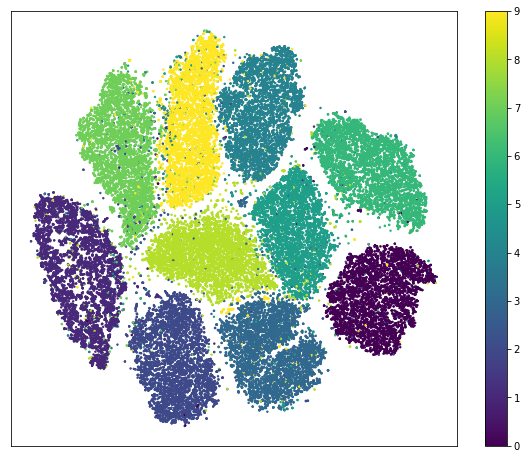

In [5]:
# WARNING: running t-SNE on the full data set takes a while.
X_tsn = X_train/255
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_res = tsne.fit_transform(X_tsn)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=Y_train, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(X_train, Y_train, test_size = 0.2,random_state = 1212)

In [7]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_validation:', x_validation.shape)
print('y_validation:', y_validation.shape)
print('x_test:', X_test.shape)
print('y_test:', Y_test.shape)

x_train: (48000, 784)
y_train: (48000,)
x_validation: (12000, 784)
y_validation: (12000,)
x_test: (10000, 784)
y_test: (10000,)


In [8]:
#Here we're just trying to normalize from values range of [0...255] to [0...1].
x_train = x_train / 255.0
x_test = X_test / 255.0

# Reshaping data
x_train = x_train.values.reshape(-1,28,28,1)
x_test = X_test.values.reshape(-1,28,28,1)
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(Y_test, num_classes = 10)

In [9]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_validation:', x_validation.shape)
print('y_validation:', y_validation.shape)
print('x_test:', x_test.shape)
print('y_test:', Y_test.shape)

x_train: (48000, 28, 28, 1)
y_train: (48000, 10)
x_validation: (12000, 784)
y_validation: (12000,)
x_test: (10000, 28, 28, 1)
y_test: (10000,)


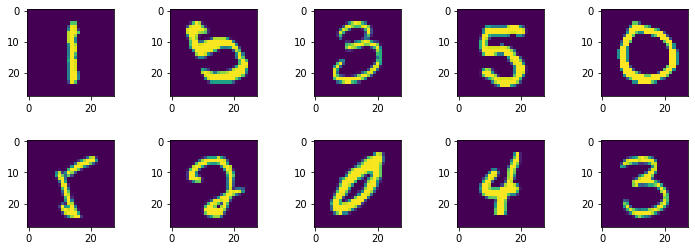

In [10]:
# Display Some images of hanwritten Digits in The Train Partition

%matplotlib inline
# preview the images first
plt.figure(figsize=(12,4))
for i in range(10):  
    plt.subplot(2, 5, i+1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
    
plt.show()

In [11]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT,_) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [12]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 15
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()

    model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))
    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))


   # model[j].add(Conv2D(128, kernel_size = 4, activation='relu'))
    #model[j].add(BatchNormalization())
    #model[j].add(Flatten())
    #model[j].add(Dropout(0.4))
    #model[j].add(Dense(10, activation='softmax'))
    
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10, activation='softmax'))

    # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

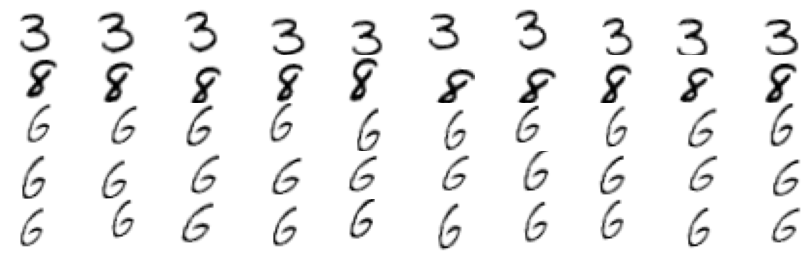

In [14]:
# PREVIEW AUGMENTED IMAGES
X_train3 = x_train[9,].reshape((1,28,28,1))
Y_train3 = y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(50):  
    plt.subplot(5, 10, i+1)
    X_train2, Y_train2 = datagen.flow(X_train3,Y_train3).next()
    plt.imshow(X_train2[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: X_train3 = x_train[11,].reshape((1,28,28,1))
    if i==19: X_train3 = x_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [15]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
history = [0] * nets
epochs = 45
for j in range(nets):
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size = 0.1)
    
    history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),
        epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,  
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

C:\Users\KIIT\AppData\Local\Temp/ipykernel_25596/2111863557.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),


CNN 1: Epochs=45, Train accuracy=0.99595, Validation accuracy=0.99708
CNN 2: Epochs=45, Train accuracy=0.99611, Validation accuracy=0.99854
CNN 3: Epochs=45, Train accuracy=0.99625, Validation accuracy=0.99646
CNN 4: Epochs=45, Train accuracy=0.99637, Validation accuracy=0.99646
CNN 5: Epochs=45, Train accuracy=0.99644, Validation accuracy=0.99667
CNN 6: Epochs=45, Train accuracy=0.99597, Validation accuracy=0.99563
CNN 7: Epochs=45, Train accuracy=0.99618, Validation accuracy=0.99687
CNN 8: Epochs=45, Train accuracy=0.99637, Validation accuracy=0.99687
CNN 9: Epochs=45, Train accuracy=0.99618, Validation accuracy=0.99708
CNN 10: Epochs=45, Train accuracy=0.99623, Validation accuracy=0.99521
CNN 11: Epochs=45, Train accuracy=0.99604, Validation accuracy=0.99813
CNN 12: Epochs=45, Train accuracy=0.99609, Validation accuracy=0.99687
CNN 13: Epochs=45, Train accuracy=0.99630, Validation accuracy=0.99458
CNN 14: Epochs=45, Train accuracy=0.99644, Validation accuracy=0.99771
CNN 15: Epochs=

In [17]:
# ENSEMBLE PREDICTIONS AND SUBMIT
results = np.zeros( (x_test.shape[0],10) ) 
for j in range(nets):
    results = results + model[j].predict(x_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("MNIST-CNN-ENSEMBLE.csv",index=False)

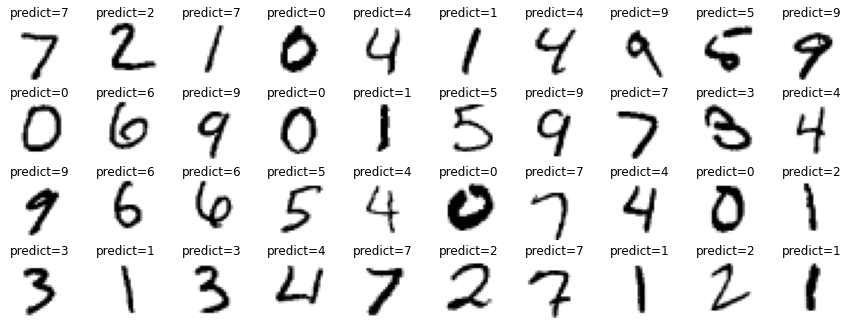

In [18]:
# PREVIEW PREDICTIONS
plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(x_test[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("predict=%d" % results[i],y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()

In [19]:
model[1].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_9 (Batc  (None, 12, 12, 32)      

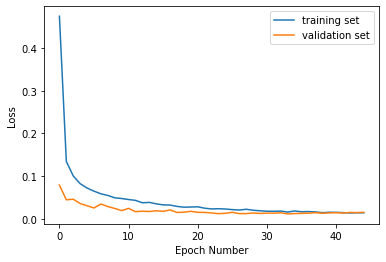

In [20]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history[0].history['loss'], label='training set')
plt.plot(history[0].history['val_loss'], label='validation set')
plt.legend()

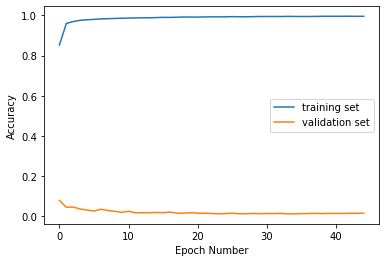

In [21]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history[0].history['accuracy'], label='training set')
plt.plot(history[0].history['val_loss'], label='validation set')
plt.legend()

In [22]:
test_loss, t1 = model[0].evaluate(x_test, y_test, verbose=2)
test_loss, t2 = model[1].evaluate(x_test, y_test, verbose=2)
test_loss, t3 = model[2].evaluate(x_test, y_test, verbose=2)
test_loss, t4 = model[3].evaluate(x_test, y_test, verbose=2)
test_loss, t5 = model[4].evaluate(x_test, y_test, verbose=2)
test_loss, t6 = model[5].evaluate(x_test, y_test, verbose=2)
test_loss, t7 = model[6].evaluate(x_test, y_test, verbose=2)
test_loss, t8 = model[7].evaluate(x_test, y_test, verbose=2)
test_loss, t9 = model[8].evaluate(x_test, y_test, verbose=2)
test_loss, t10 = model[9].evaluate(x_test, y_test, verbose=2)
sum=t1+t2+t3+t4+t5+t6+t7+t8+t9+t10
avg=sum/10
print("test accuracy: " + str(avg))

313/313 - 9s - loss: 13.1309 - accuracy: 0.8312 - 9s/epoch - 28ms/step
313/313 - 9s - loss: 8.8785 - accuracy: 0.8250 - 9s/epoch - 28ms/step
313/313 - 8s - loss: 15.0944 - accuracy: 0.7613 - 8s/epoch - 26ms/step
313/313 - 8s - loss: 21.4706 - accuracy: 0.7758 - 8s/epoch - 26ms/step
313/313 - 9s - loss: 17.7047 - accuracy: 0.7667 - 9s/epoch - 27ms/step
313/313 - 9s - loss: 8.9085 - accuracy: 0.8809 - 9s/epoch - 27ms/step
313/313 - 8s - loss: 30.5354 - accuracy: 0.6827 - 8s/epoch - 26ms/step
313/313 - 8s - loss: 29.1620 - accuracy: 0.7287 - 8s/epoch - 25ms/step
313/313 - 8s - loss: 7.6501 - accuracy: 0.8787 - 8s/epoch - 25ms/step
313/313 - 9s - loss: 15.1011 - accuracy: 0.8329 - 9s/epoch - 29ms/step
test accuracy: 0.7963900029659271
